In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import utils
import numpy as np
pd.set_option('display.max_rows', 50)
dado = utils.carregar_dados_todos_anos()

In [43]:
base = 1000000

colunas_analisadas = ['numAno', 'numMes', 'vlrDocumento', 'vlrLiquido']
analise = dado[colunas_analisadas]
analise_por_mes = analise.groupby(['numAno', 'numMes']).sum()

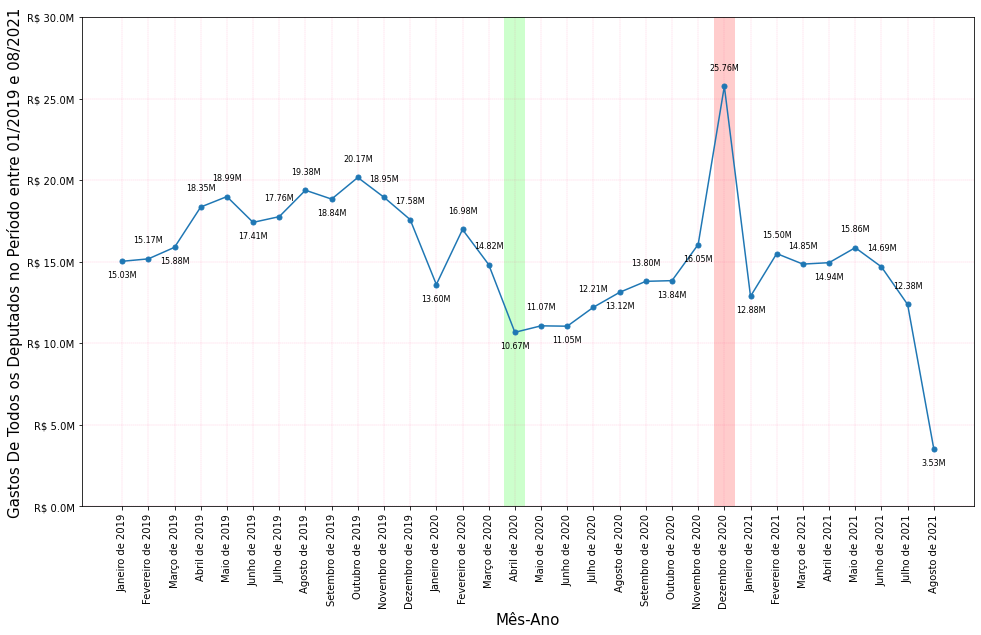

In [44]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

analise_por_mes.vlrDocumento.plot(style='-o', ax=ax, figsize=(16, 9), ms=5)

indices = analise_por_mes.index.to_frame()
indices = indices.numMes.astype(str) + '/' + indices.numAno.astype(str)
indices = indices.to_numpy()
indices = utils.formatar_datas_para_rotulo(pd.Series(indices))

min_y, max_y = utils.gerar_limites_eixo_y(
    analise_por_mes.vlrDocumento.to_numpy())
yticks = np.linspace(minimo, maximo, 7)

ax.set_xticks(range(len(indices)))
ax.set_xticklabels(indices, rotation=90)
ax.grid(color=(1, 0.2, 0.5, 0.3), linestyle=':', linewidth=0.25)
ax.set_ylim([min_y, max_y])
ax.set_xlabel('Mês-Ano', fontsize=15)
ax.set_ylabel(
    'Gastos De Todos os Deputados no Período entre 01/2019 e 08/2021', fontsize=15)

ax.set_yticks(yticks)

yticks = [f'R$ {x/1000000}M' for x in yticks]
ax.set_yticklabels(yticks)

valores = analise_por_mes.vlrDocumento.to_numpy()
valores = np.concatenate(([max_y], valores, [max_y]))

direcao_desvio = np.sign(np.diff(valores))
direcao_desvio[[2, 19, 21, 22, 27]] = -1
direcao_desvio[[10, 11, 14, 20, 26, 29, 30]] = 1
desvios = direcao_desvio * (max_y/30)

interate = zip(desvios, analise_por_mes.vlrDocumento.to_numpy())


for eixo_x, (desvio_y, valor) in enumerate(interate):
    valor_sem_resto = valor - (valor % (base/100))
    coordenadas = (eixo_x, valor_sem_resto + desvio_y)
    ax.annotate(f'{(valor_sem_resto/base):4.2f}M',
                coordenadas, fontsize=8, ha='center')

plt.savefig('Gasto Total sem Barra Vertical.png', dpi=150, bbox_inches='tight')
plt.bar([23, 15], [max_y, max_y], color=['#ffcccc', '#ccffcc'])
plt.savefig('Gasto Total com Barra Vertical.png', dpi=150, bbox_inches='tight')
plt.show()


25760481.34


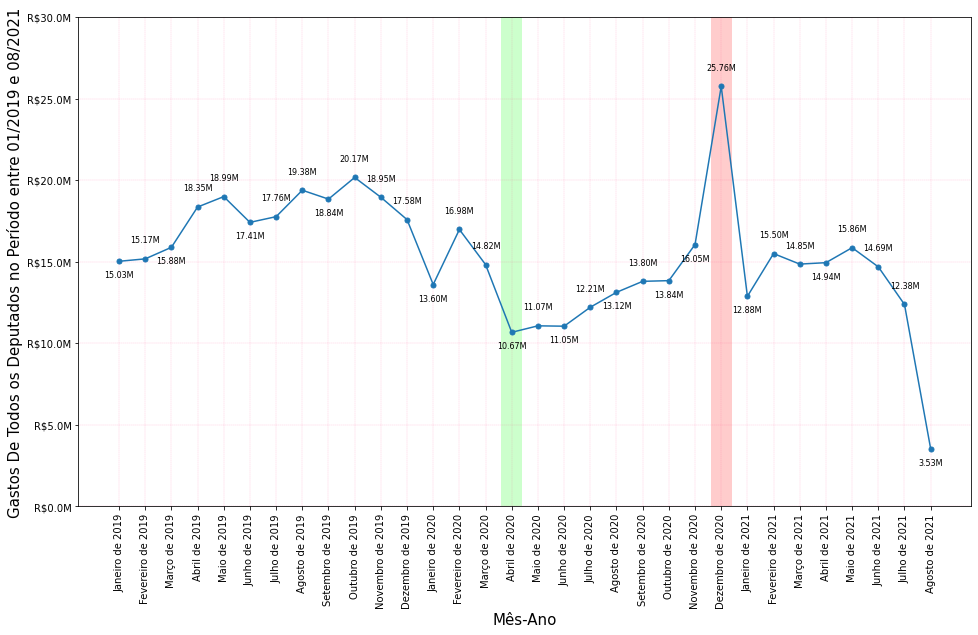

In [67]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

analise_por_mes.vlrDocumento.plot(style='-o', ax=ax, figsize=(16, 9), ms=5)

indices = analise_por_mes.index.to_frame()
indices = indices.numMes.astype(str) + '/' + indices.numAno.astype(str)
indices = utils.formatar_datas_para_rotulo(pd.Series(indices))

utils.configurar_yticks(analise_por_mes.vlrDocumento, ax, 7, 'R${}M', 1000000)

ax.set_xticks(range(len(indices)))
ax.set_xticklabels(indices, rotation=90)


ax.grid(color=(1, 0.2, 0.5, 0.3), linestyle=':', linewidth=0.25)
ax.set_xlabel('Mês-Ano', fontsize=15)
ax.set_ylabel(
    'Gastos De Todos os Deputados no Período entre 01/2019 e 08/2021', fontsize=15)



valores = analise_por_mes.vlrDocumento.to_numpy()
print(max(valores))
valores = np.concatenate(([max(valores)], valores))

direcao_desvio = np.sign(np.diff(valores))
direcao_desvio[[2, 19, 21, 22, 27]] = -1
direcao_desvio[[10, 11, 14, 20, 26, 29, 30]] = 1
desvios = direcao_desvio * (max_y/30)

interate = zip(desvios, analise_por_mes.vlrDocumento.to_numpy())


for eixo_x, (desvio_y, valor) in enumerate(interate):
    valor_sem_resto = valor - (valor % (base/100))
    coordenadas = (eixo_x, valor_sem_resto + desvio_y)
    ax.annotate(f'{(valor_sem_resto/base):4.2f}M',
                coordenadas, fontsize=8, ha='center')

plt.savefig('Gasto Total sem Barra Vertical.png', dpi=150, bbox_inches='tight')
plt.bar([23, 15], [max_y, max_y], color=['#ffcccc', '#ccffcc'])
plt.savefig('Gasto Total com Barra Vertical.png', dpi=150, bbox_inches='tight')
plt.show()